In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [120]:
df = pd.read_csv('./CC GENERAL_preprocessed.csv')

In [121]:
df.shape

(8950, 12)

### PCA Implementation

In [129]:
class PCA ():

    def __init__(self,n_components):
        self.n_components = n_components
        if self.n_components > 1:
            self.type = 'var'
        else:
            self.type = 'ratio'

    def fit(self,X):
        # mean
        self.mean = np.mean(X,axis=0)
        
        # variance
        self.variance = np.var(X, axis = 0)
        
        
        X_new = (X - self.mean )
        
        # covariance
        self.cov = np.cov(X_new.T)

        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(self.cov)
        eigenvectors = eigenvectors.T
     
        # sort eigenvalues, eigenvectors
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        
        # explained variance
        eigenvalues = np.round(eigenvalues/np.sum(eigenvalues, axis = 0),2)
        
        # cummulative explained variance
        self.cum_explained_var = np.cumsum(eigenvalues)

        # components
        if self.type == 'var':
            self.components = eigenvectors[: self.n_components]
            self.explaind_variance = eigenvalues[:self.n_components+1]
            self.index_of_ratio = self.n_components

        else:
            self.index_of_ratio =  np.where(self.cum_explained_var >= self.n_components)[0][0]
            self.explaind_variance = eigenvalues[:self.index_of_ratio+1]
            self.components = eigenvectors[:self.index_of_ratio]
   
        X_new = np.dot(X_new,self.components.T)
        return X_new

    def transform(self,Z):
        Z_new = (Z - self.mean )/ self.variance
        Z_new = Z_new * self.components

        return Z_new

    #optional 
    def plot_explained_variance(self):
        plt.bar(np.arange(self.index_of_ratio+1), self.cum_explained_var[:self.index_of_ratio+1])
        plt.axhline(self.cum_explained_var[self.index_of_ratio], color='red', ls='dotted')
        plt.xlabel("Index")
        plt.ylabel("Threshold")
        plt.title("plot_explained_variance")
        plt.show()

pca_section = PCA(n_components=0.95)
X_transofmed = pca_section.fit(df.values)
pca_section.components #return matrix (4,n)
print(pca_section.explaind_variance)
print(pca_section.cum_explained_var[:pca_section.index_of_ratio+1])
X_transofmed.shape

[0.42 0.34 0.1  0.07 0.05]
[0.42 0.76 0.86 0.93 0.98]


(8950, 4)

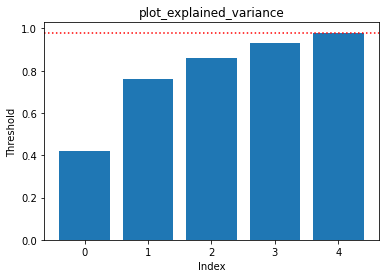

In [123]:
pca_section.plot_explained_variance()

In [124]:
pca_section = PCA(n_components=4)
X_transofmed = pca_section.fit(df.values)
pca_section.components #return matrix (4,n)
print(pca_section.explaind_variance)
print(pca_section.cum_explained_var[:pca_section.index_of_ratio+1])

[0.42 0.34 0.1  0.07 0.05]
[0.42 0.76 0.86 0.93 0.98]


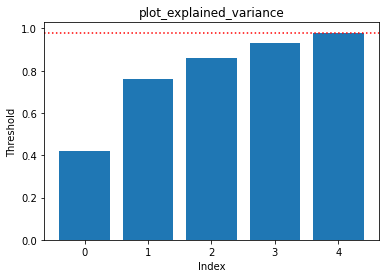

In [125]:
pca_section.plot_explained_variance()

### Sklearn

In [126]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(df.values)
print(pca.explained_variance_ratio_)
cum_explained_var = pca.explained_variance_ratio_.cumsum()
cum_explained_var

[0.4249138  0.34068371 0.10280616 0.06717709 0.05458584]


array([0.4249138 , 0.76559751, 0.86840367, 0.93558076, 0.9901666 ])

In [127]:
index_of_ratio = 5

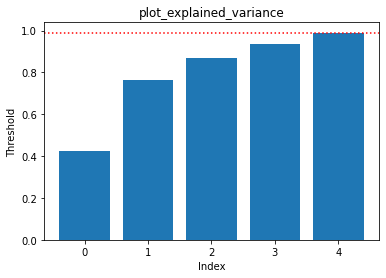

In [128]:
plt.bar( np.arange(index_of_ratio) , cum_explained_var[0:index_of_ratio])
plt.axhline(cum_explained_var[index_of_ratio-1], color='red', ls='dotted')
plt.xlabel("Index")
plt.ylabel("Threshold")
plt.title("plot_explained_variance")
plt.show()